# Do we need more highly rated professors at UMD?

At the University of Maryland - College Park (UMD), students hope to be able produce "fearless ideas". As a result, most expect help and assistance from professors/lecturers who can easily explain and teach them lecture material. At the same time, they expect their skills to be challenged through projects and examinations that are within their potential. However, how many professors truly meet student expectations? Does UMD need more or does it already have a fair amount of good professors?

I. Data collection and parsing/management +  representation
    a. rating data
II. Exploratory Data Analysis
    a. Who are the top rated professors?
        - number of ratings the professors get? 
    b. How do they compare in terms of compensation?
    b. Group by departments 
III. Hypothesis testing
    a. See how strongly ratings are correlated with salary
        - What improvement needs to be made?
            - are there certain departments that needs more highly rated professors??
    What should be done?
        -  
IIV

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import requests

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
from tqdm import tqdm

In [6]:
tqdm.pandas()

## Data Collection

In [8]:
#Reading the data usings pandas and viewing the head
salary_data = pd.read_csv("data/umd_salaries.csv").drop(columns=["Unnamed: 0"])
salary_data.head()

,Division,Department,Title,Employee,Salary
0,Office of the\nPresident,PRES-President's Office,President,"Pines, Darryll J.","$791,966.25"
1,Office of the\nPresident,PRES-Intercollegiate Athletics,Head Coach,"Turgeon, Mark","$725,000.00"
2,Office of the\nPresident,PRES-Intercollegiate Athletics,Director of\nAthletics,"Evans, Damon","$675,649.56"
3,Office of the\nPresident,PRES-Intercollegiate Athletics,Head Coach BB,"Frese, Brenda S.","$666,600.00"
4,Office of the\nPresident,PRES-Intercollegiate Athletics,Asst Coach,"Stewart, Brian","$550,000.00"


In [8]:
salary_data["Salary"] = salary_data["Salary"].apply(lambda x : float(x.replace('$', '').replace(',', '')), inplace=True)

0        791966.25
1        725000.00
2        675649.56
3        666600.00
4        550000.00
           ...    
10237      1984.39
10238      1883.77
10239      1251.54
10240      1147.08
10241       649.39
Name: Salary, Length: 10242, dtype: float64

In [9]:
salary_data.drop_duplicates(['Employee'],inplace=True)

In [10]:
ratings = []
for i in tqdm(range(119)): # through experimentation got 119
    ratings.append(
        pd.DataFrame(requests.get("https://planetterp.com/api/v1/professors",params={"reviews": "true", "offset": str(i * 100)}).json())
    )
ratings

100%|███████████████████████████████| 119/119 [01:50<00:00,  1.08it/s]


[                                              courses  average_rating  \
 0             [INST737, ENPM808W, ENPM808W, ENPM808W]             NaN   
 1                      [MUSC800W, MUSC830W, MUSC830W]             NaN   
 2                                  [THET678, THET499]             NaN   
 3   [NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...          5.0000   
 4     [CMLT235, ENGL101, ENGL234, ENGL101H, AASP298L]             NaN   
 ..                                                ...             ...   
 95  [SPHL498T, SPHL498G, FMSC410, SPHL498F, PHSC49...             NaN   
 96                                 [UNIV100, CMSC100]             NaN   
 97  [ENGL101, ENGL273, ENGL243, ENGL271, ENGL353, ...          4.4444   
 98  [ENGL101, UNIV100, UNIV101, ARHU458, ARHU468, ...             NaN   
 99  [ENGL201, ENGL404, ENGL310, ENGL304, ENGL428X,...             NaN   
 
          type                                            reviews  \
 0   professor                           

In [11]:
ratings = pd.concat(ratings).reset_index(drop = True)
ratings 

,courses,average_rating,type,reviews,name,slug
0,"[INST737, ENPM808W, ENPM808W, ENPM808W]",NaN,professor,[],A Seyed,seyed
1,"[MUSC800W, MUSC830W, MUSC830W]",NaN,professor,[],Aaron Goldman,goldman_aaron
2,"[THET678, THET499]",NaN,professor,[],Aaron Posner,posner
3,"[NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...",5.0,professor,"[{'professor': 'Abani Pradhan', 'course': None...",Abani Pradhan,pradhan
4,"[CMLT235, ENGL101, ENGL234, ENGL101H, AASP298L]",NaN,professor,[],Abbey Morgan,morgan_abbey
...,...,...,...,...,...,...
11841,[],5.0,ta,"[{'professor': 'Nathan McLane', 'course': 'CHE...",Nathan McLane,mclane_nathan
11842,[],5.0,ta,"[{'professor': 'Dominc Brady', 'course': 'BSCI...",Dominc Brady,brady_dominc
11843,[],5.0,professor,"[{'professor': 'Emma Newton', 'course': 'COMM1...",Emma Newton,newton_emma
11844,[],5.0,ta,"[{'professor': 'Tyler Clark', 'course': 'MATH2...",Tyler Clark,clark_tyler


In [12]:
ratings["reviews"] = ratings["reviews"].apply(lambda x: len(x))
ratings

,courses,average_rating,type,reviews,name,slug
0,"[INST737, ENPM808W, ENPM808W, ENPM808W]",NaN,professor,0,A Seyed,seyed
1,"[MUSC800W, MUSC830W, MUSC830W]",NaN,professor,0,Aaron Goldman,goldman_aaron
2,"[THET678, THET499]",NaN,professor,0,Aaron Posner,posner
3,"[NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...",5.0,professor,1,Abani Pradhan,pradhan
4,"[CMLT235, ENGL101, ENGL234, ENGL101H, AASP298L]",NaN,professor,0,Abbey Morgan,morgan_abbey
...,...,...,...,...,...,...
11841,[],5.0,ta,1,Nathan McLane,mclane_nathan
11842,[],5.0,ta,1,Dominc Brady,brady_dominc
11843,[],5.0,professor,1,Emma Newton,newton_emma
11844,[],5.0,ta,1,Tyler Clark,clark_tyler


In [13]:
ratings = ratings[ratings["type"] == "professor"]

In [14]:
# reformatted 
salary_data["name"] = salary_data["Employee"].apply(lambda x : x.split(", ")[1].split(" ")[0] + " " + x.split(", ")[0] if ", " in x else x.split(" ")[0])
data = pd.merge(salary_data, ratings, on="name")

In [15]:
data

,Division,Department,Title,Employee,Salary,name,courses,average_rating,type,reviews,slug
0,Office of the\nPresident,PRES-President's Office,President,"Pines, Darryll J.","$791,966.25",Darryll Pines,"[ENES181, UNIV110, UNIV110]",4.1667,professor,6,pines
1,Sr VP\nAcademic\nAffairs &\nProvost,SVPAAP-SVP Sr VP Academic\nAffairs & Provost,Senior VP &\nProvost,"Rice, Jennifer King","$517,625.00",Jennifer Rice,"[EDPS676, EDPS615, EDPS788E, EDPS679]",NaN,professor,0,rice_jennifer
2,"College of\nComputer, Math\n& Natural\nSciences",CMNS-Physics,Dist Univ Prof &\nDirector,"Das Sarma, Sankar","$463,922.29",Sankar Das Sarma,"[PHYS839A, PHYS739, PHYS739, PHYS839A, PHYS739...",NaN,professor,0,sarma
3,Robert H. Smith\nSchool of\nBusiness,BMGT-Finance,Professor,"Kyle, Albert S.","$459,441.69",Albert Kyle,"[BUFN773, BMGT840, BMGT848M, BUFN758X, BUFN721...",3.0000,professor,2,kyle
4,Robert H. Smith\nSchool of\nBusiness,BMGT-Finance,Professor,"Maksimovic, Vojislav","$454,285.13",Vojislav Maksimovic,"[BMGT340F, BMGT340H, BUFN752, BUSM741, BMGT848...",NaN,professor,0,maksimovic
...,...,...,...,...,...,...,...,...,...,...,...
3358,College of Arts\n& Humanities,ARHU-School of Music,Lecturer,"Kellner, Paul Steven JR","$3,028.92",Paul Kellner,"[MUSC129U, MUSC629O, MUSC830W, MUSC800W, MUSC8...",NaN,professor,0,kellner
3359,Philip Merrill\nCollege of\nJournalism,JOUR-Philip Merrill College of\nJournalism,Lecturer,"Koppel, Andrea","$2,788.54",Andrea Koppel,"[JOUR328I, JOUR328I, JOUR328I]",NaN,professor,0,koppel_andrea
3360,College of\nEducation,"EDUC-Counseling, Higher\nEducation and Special...",Lecturer,"Malik Sakil, Mohammad","$2,706.80",Mohammad Malik Sakil,"[EDHI788Z, EDHI788O, EDHI788O, EDHI788O]",NaN,professor,0,sakil
3361,A. James Clark\nSchool of\nEngineering,ENGR-Maryland Applied\nGraduate Engineering,Lecturer,"Diep, Madeline M","$2,670.86",Madeline Diep,"[ENPM612, ENPM612]",NaN,professor,0,diep


In [16]:
data["average_rating"].count()

1737

In [17]:
ratings["average_rating"].count()

3003

## Exploratory Data Analysis

In [18]:
data.sort_values(by="average_rating", ascending=False)[data["average_rating"].notnull()]

/tmp/ipykernel_73922/713750489.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.sort_values(by="average_rating", ascending=False)[data["average_rating"].notnull()]


,Division,Department,Title,Employee,Salary,name,courses,average_rating,type,reviews,slug
1820,College of Arts\n& Humanities,"ARHU-School of Languages,\nLiteratures, and Cu...",Associate\nProfessor,"Arsenjuk, Luka","$88,397.97",Luka Arsenjuk,"[FREN699I, SLLC368B, SLLC343, SLLC361, FILM302...",5.0,professor,2,arsenjuk
1393,College of Arts\n& Humanities,ARHU-Communication,Associate\nProfessor,"Namkoong, Kang","$106,276.58",Kang Namkoong,"[COMM498I, COMM398E, COMM402, COMM738B, COMM39...",5.0,professor,1,namkoong
675,Sr VP\nAcademic\nAffairs &\nProvost,SVPAAP-Institute for Bioscience\n& Biotechnolo...,Professor,"Culver, James N.","$153,578.10",James Culver,"[HONR269V, PLSC489W, PLSC689W, PLSC399, PLSC61...",5.0,professor,3,culver
2633,Undergraduate\nStudies,UGST-Academic Achievement\nPrograms,Adm Couns,"Truong, Lynn Mai","$54,973.89",Lynn Truong,[UNIV100],5.0,professor,1,truong_lynn
681,College of\nAgriculture &\nNatural\nResources,AGNR-Veterinary Medicine\nProgram,Professor,"Tablante, Nathaniel L. JR","$153,115.23",Nathaniel Tablante,"[ANSC398V, ANSC489A, HONR268Z, VMSC700, ANSC43...",5.0,professor,1,tablante
...,...,...,...,...,...,...,...,...,...,...,...
2158,College of Arts\n& Humanities,ARHU-College of Arts &\nHumanities,Director,"Schmidt, Johnna Marie","$74,537.66",Johnna Schmidt,"[ARHU319A, ARHU318, ARHU320, ARHU309, ARHU338,...",1.0,professor,1,schmidt_johnna
631,"College of\nComputer, Math\n& Natural\nSciences",CMNS-Physics,Assistant Professor,"Kollar, Alicia J.","$157,651.56",Alicia Kollar,"[HLTH710, PHYS721, PHYS375, PHYS721, PHYS375, ...",1.0,professor,1,kollar
3163,College of Arts\n& Humanities,ARHU-Classics,Lecturer,"Lao, Eugenia You-Ching","$12,424.21",Eugenia Lao,"[LATN120, LATN201, LATN101, LATN102, LATN101, ...",1.0,professor,1,lao
2149,College of Arts\n& Humanities,"ARHU-School of Languages,\nLiteratures, and Cu...",Assistant Professor,"Alvizu, Josh","$74,656.02",Josh Alvizu,"[GERM322, GERM322H, GERM449G, GERM689G, GERM30...",1.0,professor,1,alvizu


<AxesSubplot: >

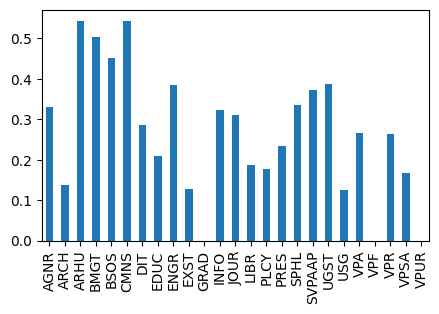

In [19]:
fig, ax = plt.subplots(figsize = (5,3))
h = data["Department"].apply(lambda x: x.split("-")[0])
(h[data["average_rating"] >= 3].value_counts()/h.value_counts()).plot(ax=ax, kind='bar')

In [20]:
data["Dept Abb"] = data["Department"].apply(lambda x: x.split("-")[0])

In [22]:
cur_dept_df["average_rating"]

Series([], Name: average_rating, dtype: float64)

array([[<AxesSubplot: title={'center': 'AGNR'}>,
        <AxesSubplot: title={'center': 'ARCH'}>,
        <AxesSubplot: title={'center': 'ARHU'}>,
        <AxesSubplot: title={'center': 'BMGT'}>,
        <AxesSubplot: title={'center': 'BSOS'}>],
       [<AxesSubplot: title={'center': 'CMNS'}>,
        <AxesSubplot: title={'center': 'DIT'}>,
        <AxesSubplot: title={'center': 'EDUC'}>,
        <AxesSubplot: title={'center': 'ENGR'}>,
        <AxesSubplot: title={'center': 'EXST'}>],
       [<AxesSubplot: title={'center': 'GRAD'}>,
        <AxesSubplot: title={'center': 'INFO'}>,
        <AxesSubplot: title={'center': 'JOUR'}>,
        <AxesSubplot: title={'center': 'LIBR'}>,
        <AxesSubplot: title={'center': 'PLCY'}>],
       [<AxesSubplot: title={'center': 'PRES'}>,
        <AxesSubplot: title={'center': 'SPHL'}>,
        <AxesSubplot: title={'center': 'SVPAAP'}>,
        <AxesSubplot: title={'center': 'UGST'}>,
        <AxesSubplot: title={'center': 'USG'}>],
       [<AxesSub

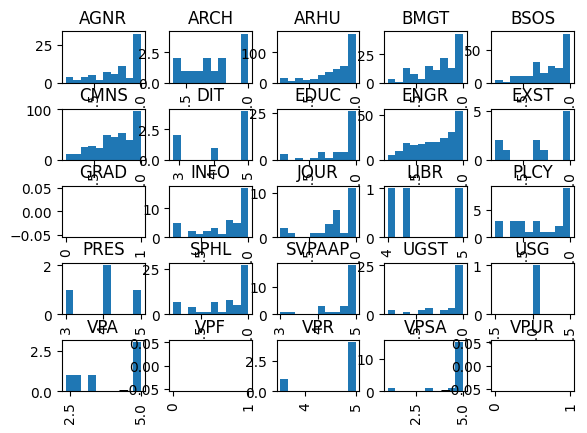

In [23]:
data["average_rating"].hist(by=data["Dept Abb"])

0      4.1667
276    4.0000
296    3.0000
946    5.0000
Name: average_rating, dtype: float64
22      4.3333
61      4.0000
352     5.0000
475     4.0000
490     5.0000
675     5.0000
687     4.6667
937     5.0000
1085    5.0000
1333    5.0000
1725    3.3333
1811    5.0000
1911    5.0000
1914    5.0000
1985    4.5000
2011    5.0000
2070    5.0000
2120    4.6667
2142    5.0000
2178    5.0000
2201    5.0000
2203    4.7500
2250    5.0000
2269    3.0000
2324    5.0000
2325    5.0000
2373    5.0000
2493    4.0000
Name: average_rating, dtype: float64
24      4.0000
33      3.0000
36      5.0000
37      3.7273
41      2.8889
         ...  
3010    3.6250
3068    3.2000
3104    4.2000
3130    4.9231
3338    4.0000
Name: average_rating, Length: 384, dtype: float64
3       3.0000
5       4.0000
6       5.0000
8       1.5000
12      2.0000
         ...  
2947    5.0000
3070    1.0000
3073    4.0000
3091    2.4667
3112    5.0000
Name: average_rating, Length: 132, dtype: float64
308     5.0000
410  

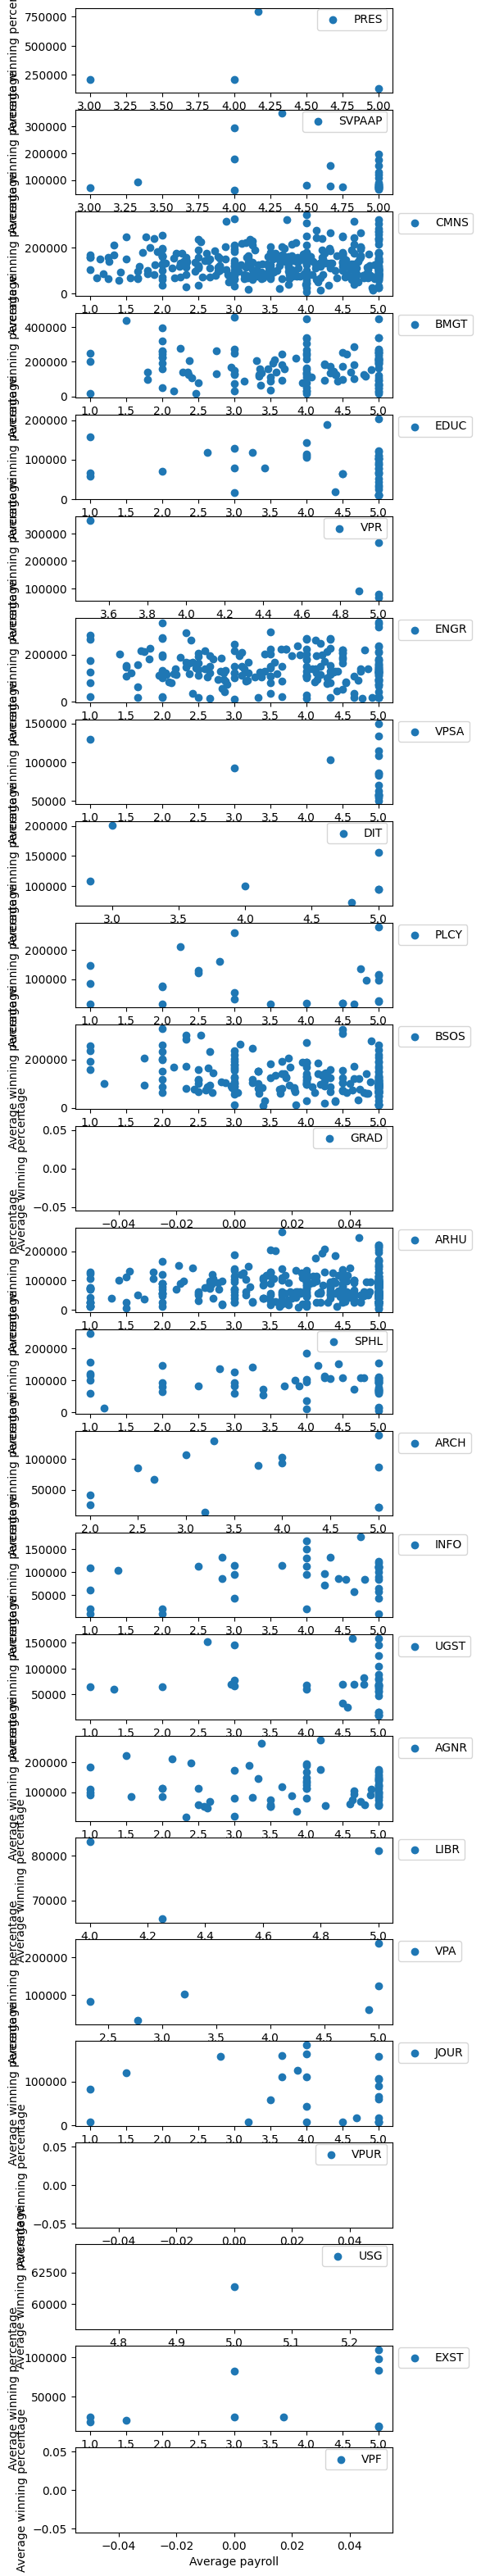

In [36]:
fig, ax = plt.subplots(len(data["Dept Abb"].unique()), figsize = (5,40))


# fig, axs = plt.subplots(5, 1 , figsize = (5, 3), dpi = 70)
# time_periods = pd.cut(df["yearID"], 5) 
# periods_list = time_periods.unique()
    
# plot for each team (a unique color used for each)
for i in range(len(data["Dept Abb"].unique())):
    dept = data["Dept Abb"].unique()[i]
    cur_dept_df = data[data["Dept Abb"] == dept] # dataframe of a specific team from the period
    cur_dept_df = cur_dept_df[cur_dept_df["average_rating"].notnull()]
    print(cur_dept_df["average_rating"])
    ax[i].scatter(cur_dept_df["average_rating"], cur_dept_df["Salary"], label = dept)
   # axs[i].annotate(team, (cur_team_df["total_payroll"].mean(), cur_team_df["win_percentage"].mean()))

    # graph settings
    ax[i].legend(bbox_to_anchor=(1.0, 1.05))
    #ax.set_title("Average winning percentage vs Average Payroll between " + str(periods_list[i]))
    ax[i].set_xlabel("Average payroll")
    ax[i].set_ylabel("Average winning percentage")



In [24]:
ratings.sort_values(by="average_rating", ascending=False)[ratings["average_rating"].notnull()]

/tmp/ipykernel_73922/2137845200.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings.sort_values(by="average_rating", ascending=False)[ratings["average_rating"].notnull()]


,courses,average_rating,type,reviews,name,slug
3,"[NFSC431, NFSC679R, NFSC112, HLTH672, HLTH710,...",5.0,professor,1,Abani Pradhan,pradhan
4797,"[SOCY398C, SOCY370, SOCY110, SOCY477, SOCY105,...",5.0,professor,1,Nicole DeLoatch,deloatch_nicole
4911,"[PHIL140, PHIL309C, PHIL362, PHIL220, PHIL220H...",5.0,professor,1,Charles Barclay,barclay
4880,"[HONR348P, HONR100, HONR348D, HONR299Q, PHYS13...",5.0,professor,3,William Dorland,dorland_william
4864,"[HACS408D, INST364, INST408W, INST408C, INST46...",5.0,professor,2,Susan Campbell,campbell_susan
...,...,...,...,...,...,...
5383,"[KNES692, KNES465, KNES465H, KNES360, KNES360H...",1.0,professor,1,Sushant Ranadive,ranadive
607,"[ENTS625, BMGT495, BMGT364, BMGT461, BMGT461M,...",1.0,professor,1,David Kressler,kressler
10991,"[BSCI338N, PSYC489G, BSCI338N, PSYC489G, BSCI3...",1.0,professor,1,Mary Ann Rankin,rankin_mary_ann
10996,"[ECON426, ECON426]",1.0,professor,2,Shuqing Chen,chen_shuqing


<AxesSubplot: >

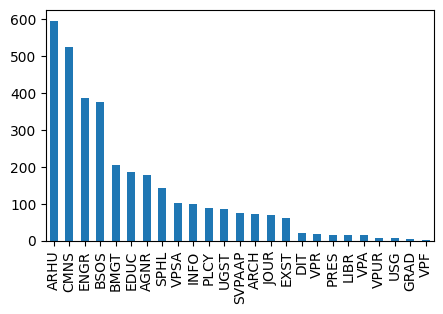

In [25]:
fig, ax = plt.subplots(figsize = (5,3))
data["Department"].apply(lambda x: x.split("-")[0]).value_counts().plot(ax=ax, kind='bar')

<AxesSubplot: >

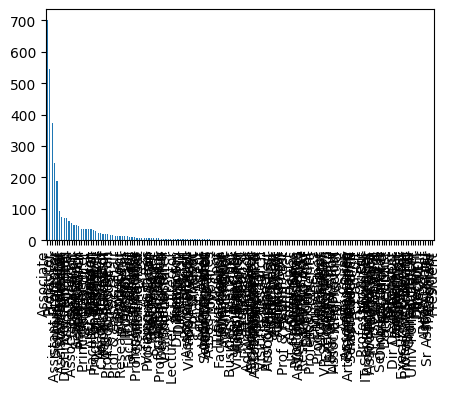

In [26]:
fig, ax = plt.subplots(figsize = (5,3))
data["Title"].value_counts().plot(ax=ax, kind='bar')

In [27]:
def get_rating(professor_name):
    if "," in professor_name: 
        professor_name = professor_name.split(", ")
        professor_name = professor_name[1] + " " + professor_name[0]
    try:
        return requests.get("https://planetterp.com/api/v1/professor",params={"name":professor_name}).json()["average_rating"]
    except:
        return np.nan

ratings["com_name"] = ratings["name"].apply(lambda x : x.split()[1] + ", "  + x.split()[0] if " " in x else x)

/tmp/ipykernel_73922/584356764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["com_name"] = ratings["name"].apply(lambda x : x.split()[1] + ", "  + x.split()[0] if " " in x else x)


In [28]:
"," in "Morawski Maksym"

False